In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

# Model Evaluation and Fairness in ML

## Outline

* Metrics for model evaluation
* Understanding model performance in terms of input population
* Fairness criteria
* Why we need inference in prediction

### Last time

* Create a modeling pipeline for a classification/regression problem.
* Evaluate the model quality on test set using accuracy/RMSE.
* Are these the best metrics for evaluating models?
    - Should be evaluating the quality of a model with respect to the "business problem" at hand!

### A more detailed understanding of 'model quality'

* Accuracy is defined as the proportion of predictions that are correct.
    - treats all incorrect guesses equally
    - treats all correct guesses equally
* Ignores *how* the predictions were (in)correct!

### Aesop's Fable: The Boy Who Cried Wolf

> A shepherd boy gets bored tending the town's flock. To have some fun, he cries out, "Wolf!" even though no wolf is in sight. The villagers run to protect the flock, but then get really mad when they realize the boy was playing a joke on them.

```[Iterate previous paragraph N times.]```

> One night, the shepherd boy sees a real wolf approaching the flock and calls out, "Wolf!" The villagers refuse to be fooled again and stay in their houses. The hungry wolf turns the flock into lamb chops. The town goes hungry. Panic ensues.

Credit: [Google Developer's blog](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)

### Aesop's classification problem

* The predictor: shepherd boy.
* Positive prediction: 'there is a wolf'
* Negative prediction: 'there is no wolf'

In the story, which examples are incorrect, positive predictions? Was there a correct, negative prediction? There are four possibilities; what are the possible consequences of each?

### Wolf-prediction model summary of outcome (confusion matrix)

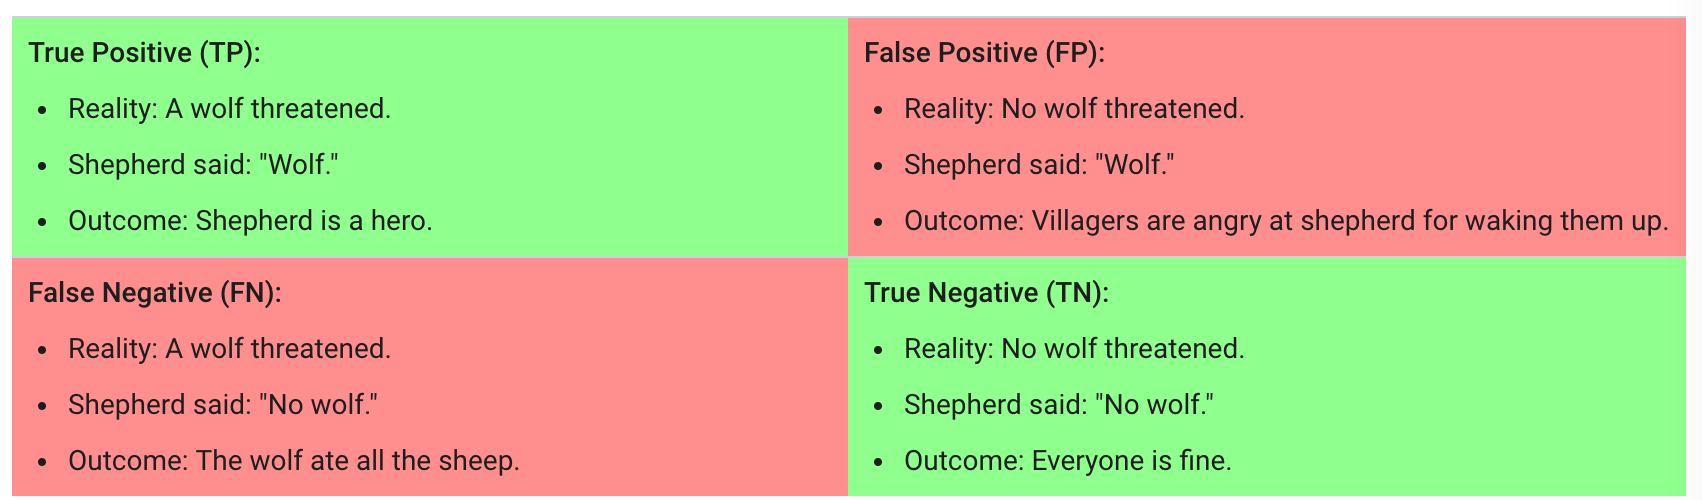

## Binary Classification Outcomes

|Outcome of Prediction|Definition|True Class|
|---|---|---|
|True positive (TP)|the model correctly predicts the positive class.|P|
|False negative (FN)|the model incorrectly predicts the negative class.|P|
|True negative (TN)|the model correctly predicts the negative class.|N|
|False positive (FP)|the model incorrectly predicts the positive class.|N|

$P = TP + FN$

$N = TN + FP$

### Example: medical screening study

* There is a study evaluating a new test that screens people for a disease.
* Each person taking the test either has or does not have the disease.
* The test outcome can be 
    - positive (classifying the person as having the disease) or 
    - negative (classifying the person as not having the disease).

The test results for each subject may or may not match the subject's actual status. 

In that setting: Describe TP, FP, TN and FN for this scenario?


### Solution: medical screening study

* TP: Sick people correctly identified as sick
* FP: Healthy people incorrectly identified as sick
* TN: Healthy people correctly identified as healthy
* FN: Sick people incorrectly identified as healthy


### Accuracy of the screening study

* Suppose the model classified 100 tumors as malignant (the positive class) or benign (the negative class):

|Positive|Negatives|
|---|---|
|Number of TP results: 1|Number of FP results: 1|
|Number of FN results: 8|Number of TN results: 90|

* What is the fraction of predictions our model got right?

$$
Accuracy = \frac{TP + TN}{P + N} = \frac{TP + TN}{TP + FN + TN + FP} = \frac{1 + 90}{1 + 8 + 90 + 1} = 0.91
$$

### How good is the result? Closer look:

* Of the 91 benign tumors, the model correctly identifies 90 as benign. 
* Of the 9 malignant tumors, the model only correctly identifies 1 as malignant: 
    - 8 out of 9 malignancies go undiagnosed!
* 91% accuracy is no better than a model that always guesses benign!
* Accuracy treats TP the same as TN; not appropriate for **class-imbalanced data**
    - class imbalanced data is when the ratio of positive-negative outcomes is far from 1.

### Sensitivity of the screening study 

* What proportion of malignant tumors were correctly identified?
* How sensitive your model to the positive class?

$$\frac{TP}{P} =\frac{TP}{TP + FN} =\frac{1}{1 + 8} = 0.11 $$

* Our model correctly identfies `11%` of all malignant tumors. (Not good!)
* What would it mean for this number to be $100\%$?

## Sensitivity

* What proportion of actual positives were correctly identified?
* Sensitivity refers to the test's ability to correctly detect ill patients who do have the condition.
* Also called: True positive rate (TPR), hit-rate, recall.

$${\rm Sensitivity} = {\rm TPR} = \frac{TP}{P} =\frac{TP}{TP + FN}$$

* Question: Given a model has high sensitivity, which is more useful: a positive or negative result?
    - What is the most extreme "highly sensitive" model?

## Specificity

* What proportion of actual negatives were correctly identified?
* Also called: Selectivity, true negative rate (TNR).

$$
{\rm Specificity} =\frac{TN}{N} = \frac{TN}{TN + FP} = \frac{90}{90 + 1} = 0.989
$$

* Our model correctly identifies `99%` of all benign tumors.
* Balances out sensitivity measure; what is the most extreme "highly specific" model?

### Example: detecting terrorism (rare events)

* Build the following model to identify terrorists trying to board flights: 
    - predict every single person flying from a US airport as **not** a terrorist.

* What is the accuracy?
    - 800 million average passengers on US flights per year 
    - 19 (confirmed) terrorists who boarded US flights from 2000–2017, 
    - Accuracy is 99.9999999%! 

* What do you think?

* What is a specificity and sensitivity?

Credit: [Towards Data Science blog](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

### Example: detecting terrorism (rare events)

Build a model that randomly predicts with the following rule:

> assigns label "terrorist" with probability $p$.


<div class="image-txt-container">
    
* sensitivity/recall: terrorists correctly labeled.
* specificity: non-terrorists correctly labeled.
* sensitivity/recall and specificity balance each other.
    - in a 'good' model, both are close to 1.0

<img src="imgs/spec_recall.png">

</div>

## Imbalanced Classification Problem

* A dataset exhibits **class imbalance** if the majority of data have the same label.

* Examples:

|Many|Few|
|---|---|
|Not terrorists|Terrorists|
|Healthy Patients|Very sick patients|

* Accuracy is not a good measure for assessing model performance.
* Need measure that focus on predictive accuracy of the **rare** labels.

### Example: detecting terrorism (rare events)

Need two balancing metrics:
* Sensitivity/Recall: What is the proportion of actual (rare) positives were correctly identified?
* Precision: What proportion of positive identifications were actually correct?
(when you decide to identify a passenger as a terrorist, how often are you right?)

Both focus on the rare events themselves!

### What are the precision and recall for the following models?

$$
{\rm Precision} =\frac{TP}{TP + FP}
$$


$$
{\rm Recall} =\frac{TP}{P} =\frac{TP}{TP + FN}
$$

* Model: Every passenger is NOT a terrorist.
* Model: Every passenger is a terrorist.

### Example: detecting terrorism (rare events)

Build a model that randomly assigns label "terrorist" with probability $p$.
    
* recall: terrorists correctly labeled
* precision: label terrorists that are actually terrorists
    - Every random model does poorly!

<img src="imgs/precision_recall.png" width="100%">



### Precision vs Recall

<div class="image-txt-container">
    
* Precision and recall balance each other.
* When is it useful to maximize one and not the other?
* What is the optimal combination?


<img src="imgs/precision_recall_curve.png" width="50%">

</div>

## F1-score: combining precision and recall: 


* **F1-score** combines precision and recall via the 'harmonic mean'.

* The F1 score is a measure of how well a test labels positive instances. 

* It considers both the precision and the recall (TPR) of the test to compute the score.

$$
F1 = 2 \times \frac{Precision * Recall}{Precision + Recall}
$$

Not every situation merits equal importance for Precision and Recall!

### False Discovery Rate (FDR)

* The proportion of positive identifications that were false (positives).
* Terrorism Example: the proportion of people flagged as terrorists who are normal passengers.
    - A high FDR leads to a lot of average people inconvenienced.
* Related to precision (FDR = 1 - Precision).

$$
{\rm FDR} =\frac{FP}{TP + FP}
$$


### Example: Tumor malignancy prediction
* Breast Cancer Tumor Data
    - Tumors are benign (0) or malignant (1)

* Use `sklearn.metrics` to asses model.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  # has many scores for model evaluation

In [9]:
bc = load_breast_cancer()
data = bc['data']
labels = 1 - bc['target']
cols = bc['feature_names']
bc = pd.DataFrame(data, columns=cols)

In [10]:
# through imaging
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X_tr, X_ts, y_tr, y_ts = train_test_split(bc, labels, test_size=0.7)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
preds = clf.predict(X_ts)

In [13]:
# proportion of predictions that are correct
metrics.accuracy_score(y_ts, preds)

0.899749373433584

In [14]:
# Counts of TN / FP / FN / TP
metrics.confusion_matrix(y_ts, preds)

array([[230,  18],
       [ 22, 129]])

In [15]:
tn, fp, fn, tp = metrics.confusion_matrix(y_ts, preds).ravel()
tn, fp, fn, tp

(230, 18, 22, 129)

In [16]:
# Recall: proportion of malignant tumors that were correctly identified
# TP/P
# What is the effect of the misses here?
metrics.recall_score(y_ts, preds)

0.8543046357615894

In [17]:
# Specificity: proportion of benign tumors correctly identified
# TN/N
# What is the effect of the misses here?

# Note: specificity = recall of the negative class
metrics.recall_score(y_ts, preds, pos_label=0)

0.9274193548387096

In [18]:
# Precision: proportion of flagged malignanat tumors that were actually malignant
metrics.precision_score(y_ts, preds)

0.8775510204081632

In [19]:
# FDR: proportion of flagged malignant tumors that were actually benign
# unnecessarily flagged
1 - metrics.precision_score(y_ts, preds)

0.12244897959183676

## Model evaluation and individuals

* So far: evaluate models in their entirety. 
* If the models precision is bad, *who* exactly is it bad for?
    - understanding this can help improve your model!
    - e.g. help build features that correct the misclassification.

In [20]:
# look at FP
fn = (preds == 0) & (y_ts == 1)
fp = (preds == 1) & (y_ts == 0)
tn = (preds == 0) & (y_ts == 0)
tp = (preds == 1) & (y_ts == 1)

arr = np.vstack([fn,fp,tn,tp]).T

In [21]:
# if it was fn, fp, tn, tp
arr

array([[False, False,  True, False],
       [False,  True, False, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False,  True, False]])

In [22]:
# need to know which is True
results = pd.DataFrame(arr, columns=['FN', 'FP', 'TN', 'TP']).idxmax(axis=1)
#results

In [23]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


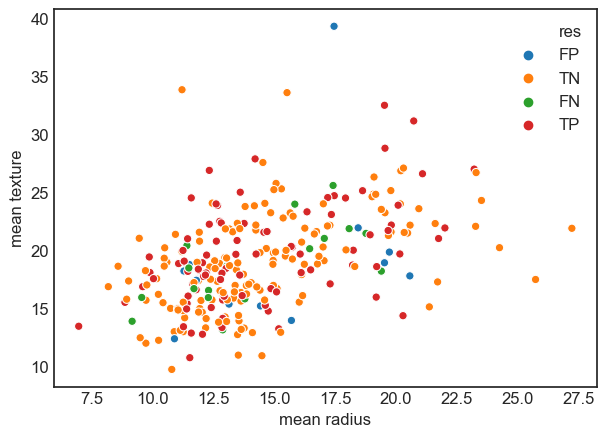

In [24]:
# two different features
sns.scatterplot(data=X_ts.assign(res=results), x='mean radius', y='mean texture', hue='res')
# check if some regions have FP or FN

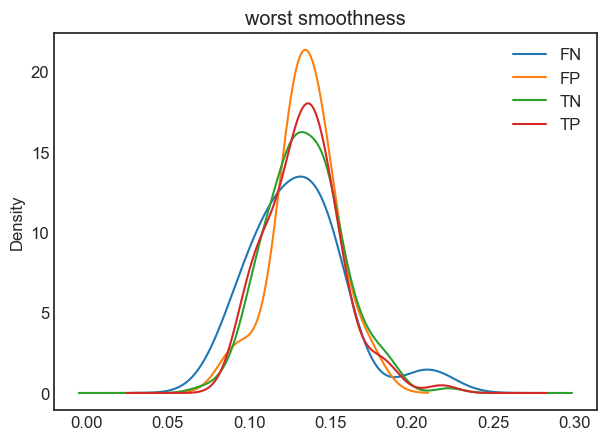

In [25]:
# Univariate analysis
# Worst smoothness distribution feature
# FP: bad tumors we could not capture
# model is not sensitive enough
col = 'worst smoothness'
X_ts.assign(res=results).groupby('res')[col].plot(kind='kde', legend=True, title=col);

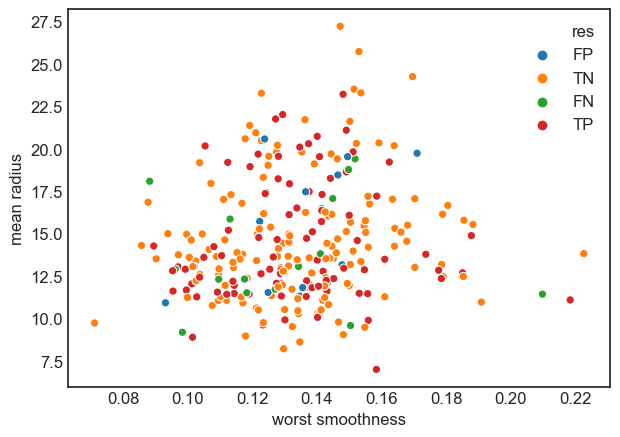

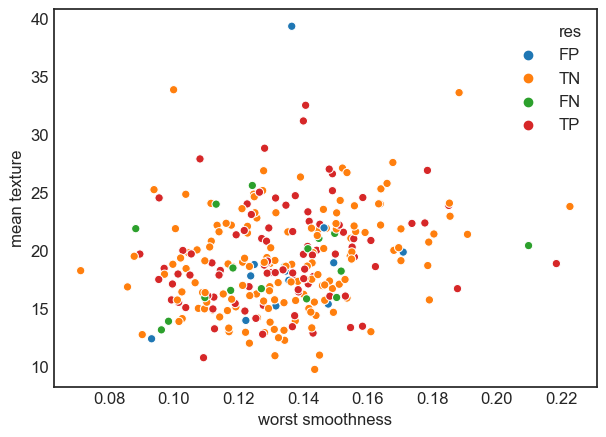

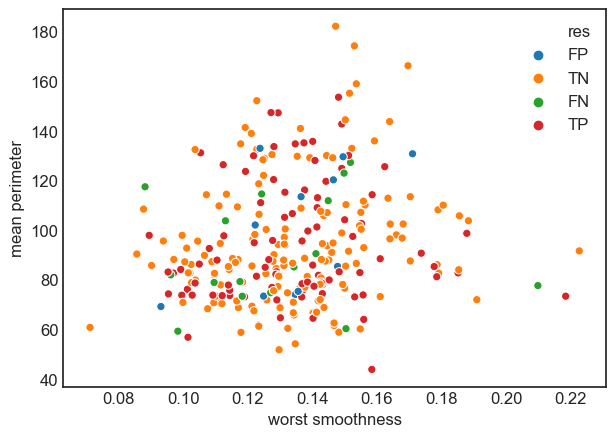

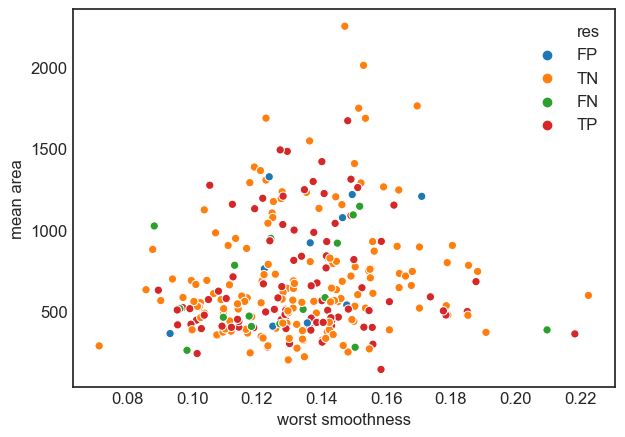

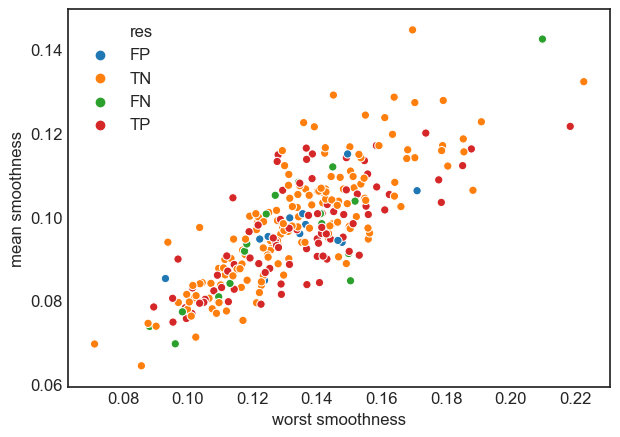

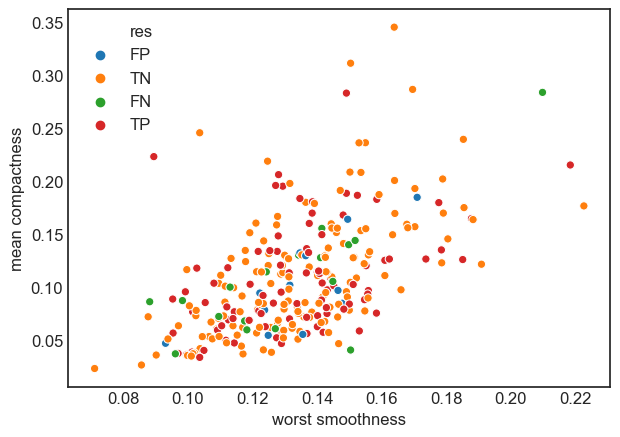

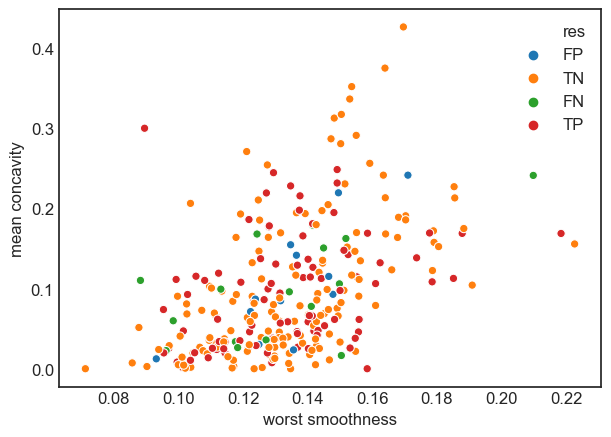

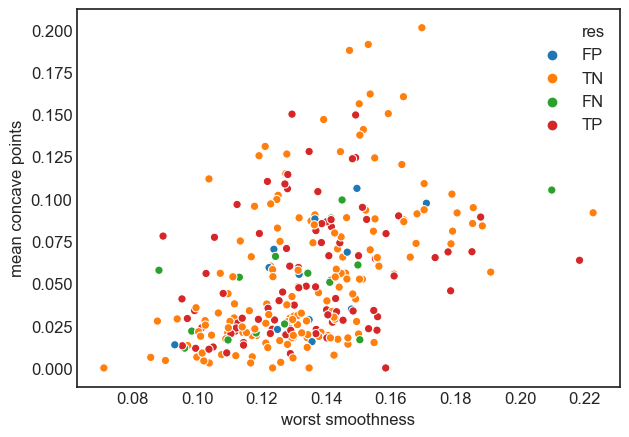

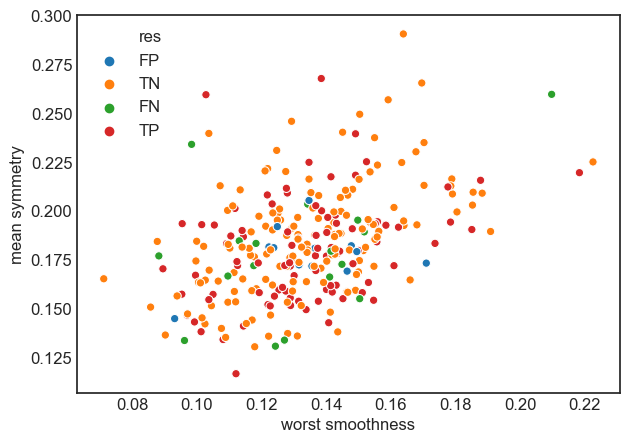

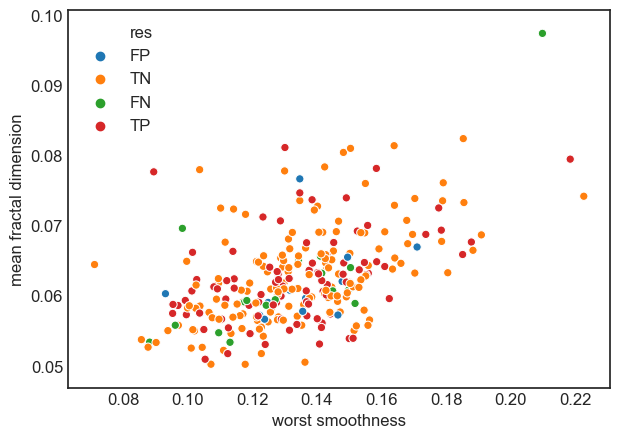

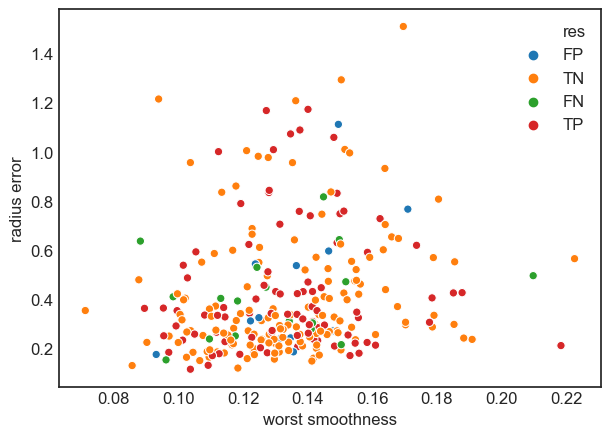

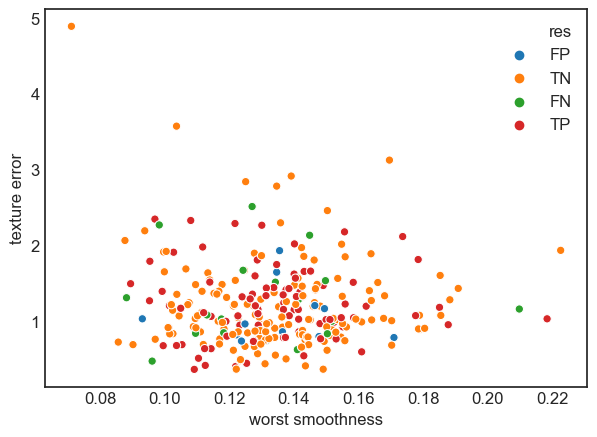

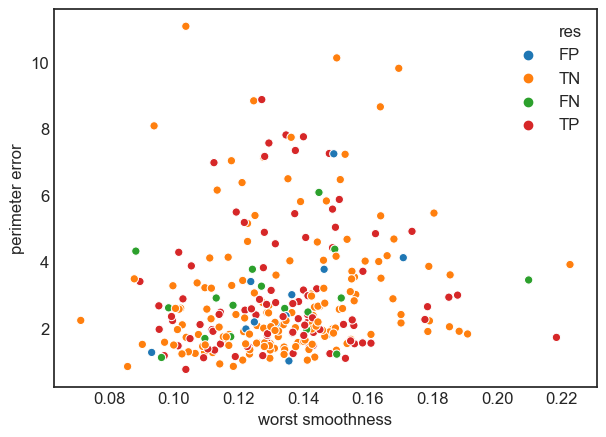

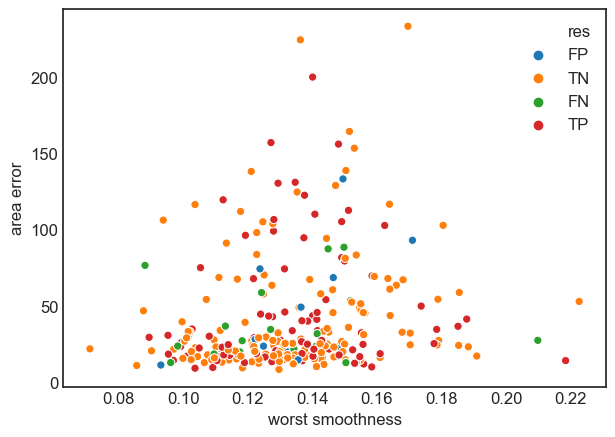

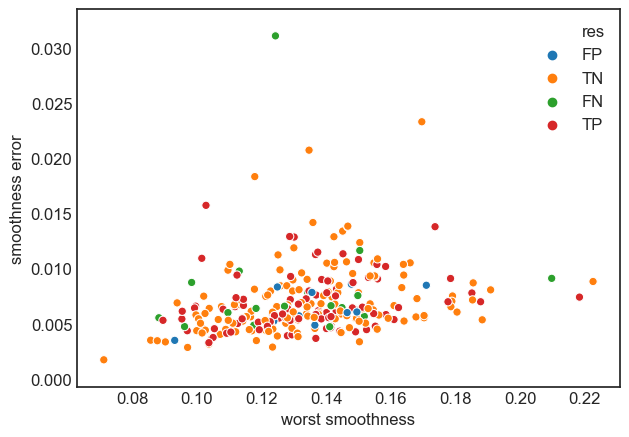

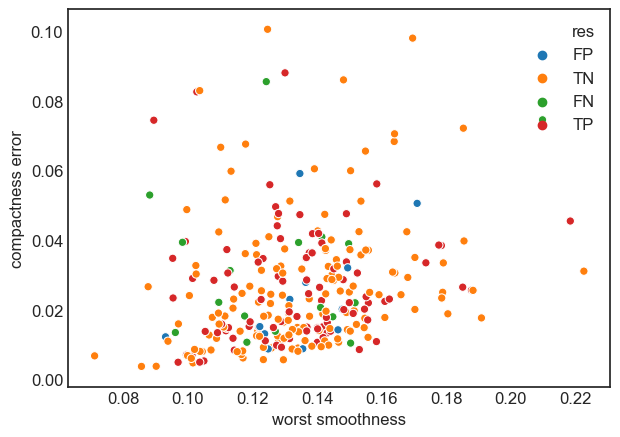

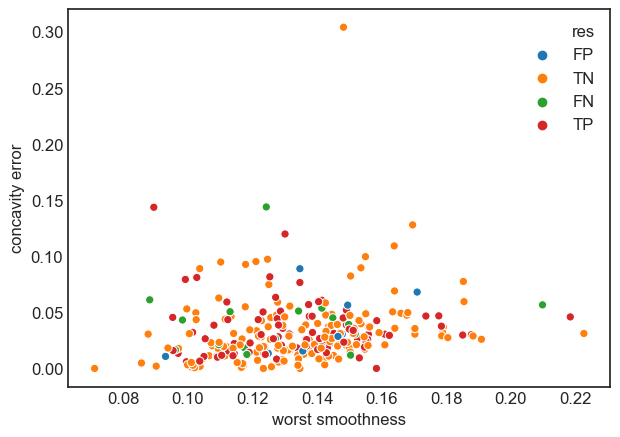

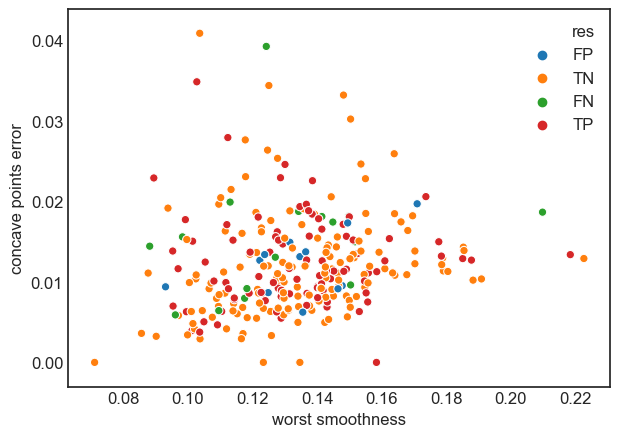

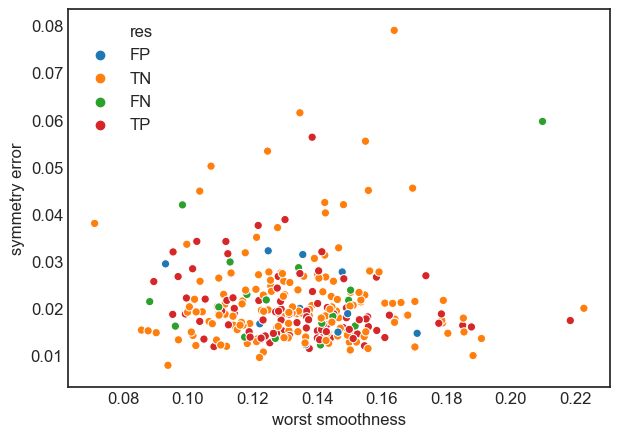

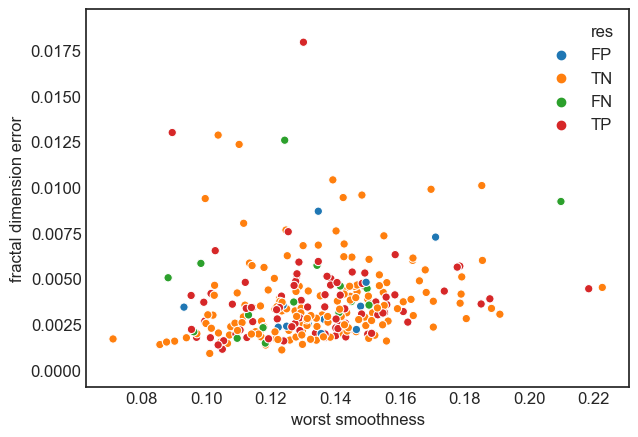

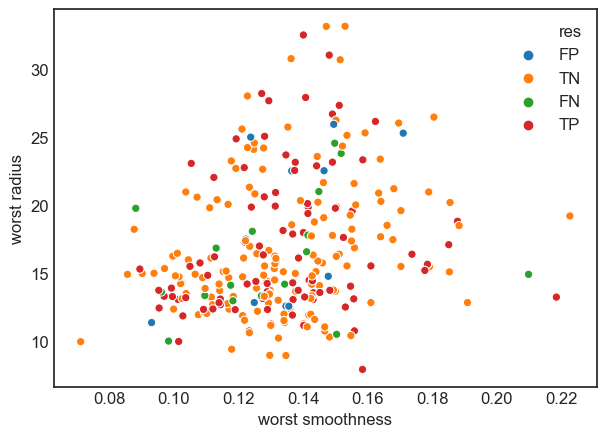

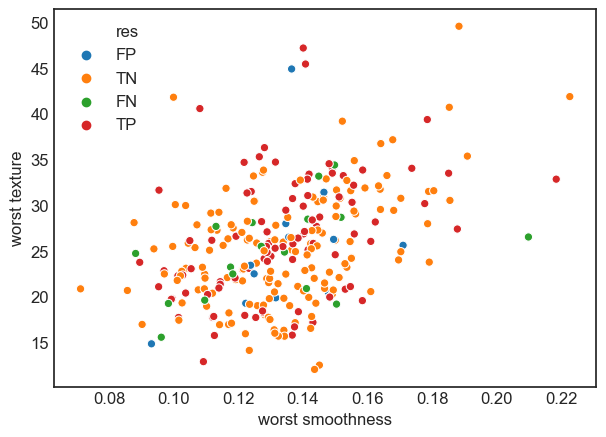

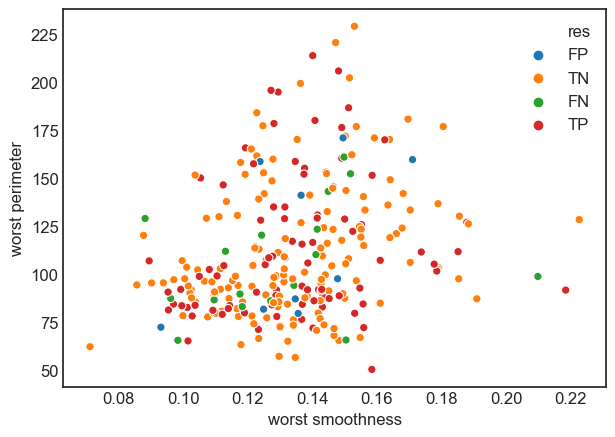

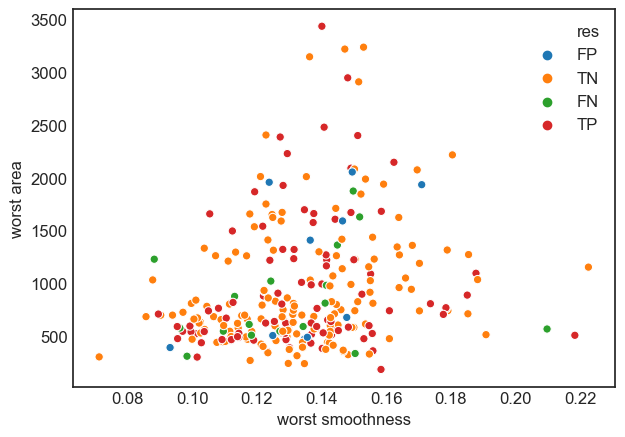

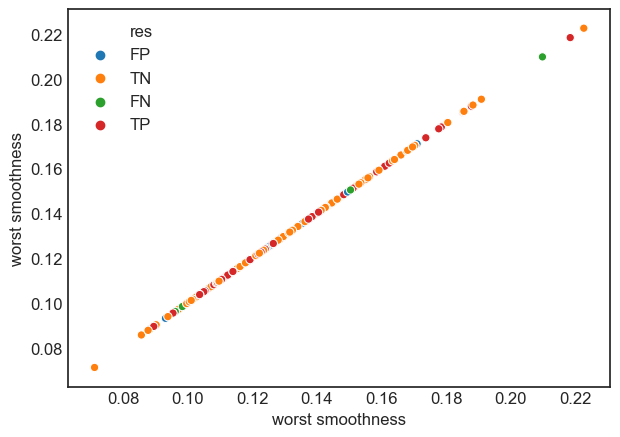

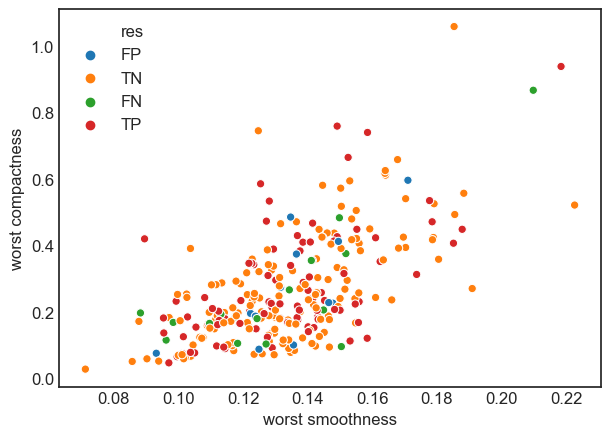

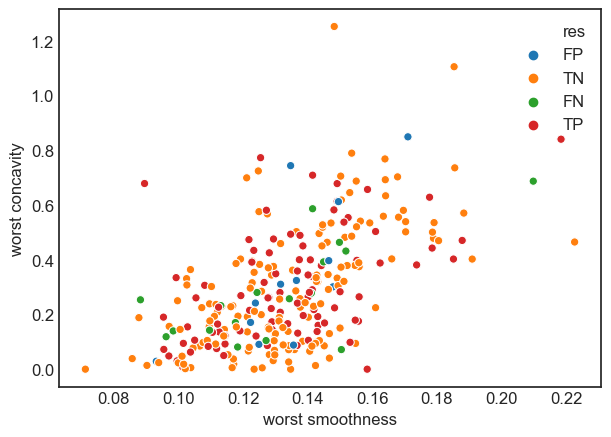

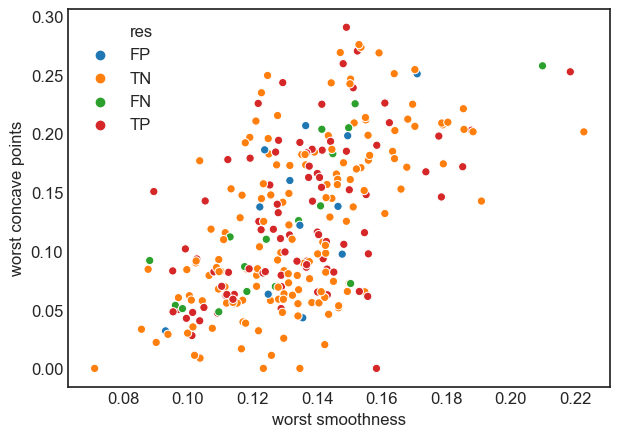

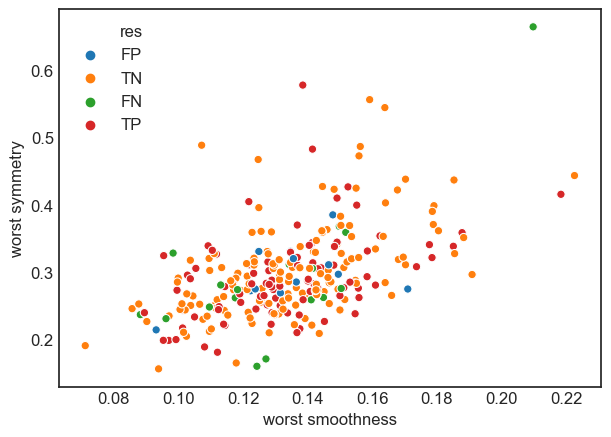

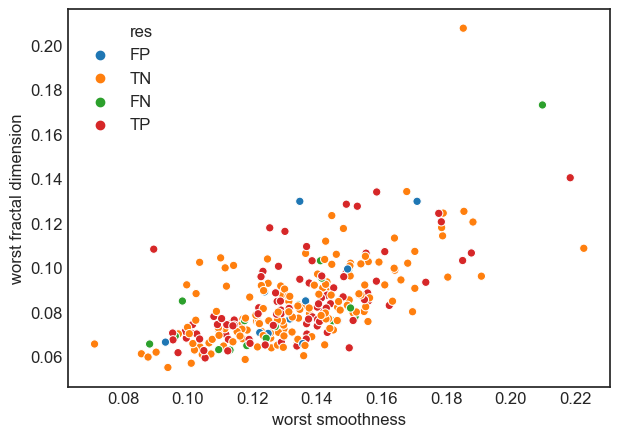

In [26]:
for x in X_ts.columns:
    sns.scatterplot(data=X_ts.assign(res=results), x='worst smoothness', y=x, hue='res')
    plt.show()

# Fairness and Model Evaluation

### "This model didn't treat us fairly"

* Translation: the model didn't perform well for me; I'm a false positive.
* Unfairness: when poor performance is systematic in nature (biased) 
    - E.g. poor performance for an entire group.
* How do you diagnose unfairness?
    - Analyze model performance by attributes of the input data.


### Fairness: why do we care?

ML is is being used in processes that significantly affect lives:
* Selecting job applicants and student admissions
* Criminal sentencing and parole grants
* Predictive policing
    - How to move police around where most needed
    - Cameras for facial recognition
* Credit and Loans

<a href="https://www.amazon.com/Weapons-Math-Destruction-Increases-Inequality/dp/0553418815"> Weapons on Math Destruction </a>

### Example: Recidivism Prediction

* The courts use a "black-box" model to estimate risk of (re)committing a crime.
* [Propublica found](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) that the model had poorer accuracy on African-American populations.

* Systematic bias to the output of this model
* FP and FN

<img src="imgs/compas.jpeg">

### Example: Face Recognition

* Popular classifiers have [lower accuracy](http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf) for women and those with darker skin color.
* Police departments are beginning to [use these models](https://www.usatoday.com/story/tech/2018/07/09/orlando-police-decide-keep-testing-amazon-facial-recognition-program/768507002/) for surveillance.
* Self-driving cars use similar models to recognize pedestrians!

<img src="imgs/imgnet.jpeg">

### (Un)Fairness in Models

* How does it occur?
* How do you define it?
* How do you find it?
* How do you fix it?

### How does bias occur?

Various kinds of bias in training data:
* Training data isn't representative of population.
* Better features for positive instances.
* Training data encodes existing human biases.
* Minority groups: fewer examples mean poorer model performance.

### What gender does English associate with the following words?

<table style="width:50%">
  <tr>
    <th>soldier</th>
    <th>teacher</th>
  </tr>
  <tr>
    <td>nurse</td>
    <td>doctor</td>
  </tr>
  <tr>
    <td>writer</td>
    <td>dog</td>
  </tr>
  <tr>
    <td>nanny</td>
    <td>cat</td>
  </tr>
  <tr>
    <td>president</td>
    <td>entrepreneur</td>
  </tr>
  <tr>
    <td>singer</td>
    <td>student</td>
  </tr>
  <tr>
    <td>hard working</td>
    <td>lazy</td>
  </tr>
</table>


### Google Translate encodes biases of the English language
* Turkish uses gender neutral third person pronouns
* Google translate build of a large collection of English/Turkish documents
* Roughly: two words have associated meaning if they commonly co-occur in text.
![translate](./imgs/translate.png)


### Image search can intensify stereotypes.

* A 2015 study examined the image queries of vocations and the gender makeup in the search results.

### A search for "nurse" returns (c. 2015):
![nurses](./imgs/nurses2015.jpg)



### A search for "doctor" returns (c. 2015):
![engineer](./imgs/doctors2015.jpg)


### What gender ratio would you expect in the results?
* Should it be 50/50?
* Should it reflect the true gender distribution of those vocations?
* What do you expect from your search results?

----

![UWresearch](./imgs/google-photos-paper.png)

* "male-dominated professions tend to have even more men
in their results than would be expected if the proportions
reflected real-world distributions."
* "People’s existing perceptions of gender ratios in occupations
are quite accurate, but that manipulated search results have an effect on perceptions."

----

### Image search results are now consistent with the "real-world" gender ratios.

![nurses](./imgs/nurses.png)

### Why did this unequal representation occur?

* Biased training data encodes existing biases:
    - photos of male doctors over-represented (not just in training data).
* ML models that "rank" give statistically biased estimates:
    - ranking algorithms predict the "most relevant", not the "typical".

### How do you fix the bias? What is unfair?

* Do you de-bias by country?
* Do you return personalized search results?
    - Personalization also creates unintended consequences.
* Is this a problem at all?
* How do you deal with this problem in general?
    - What other biases exist?
    - What are search results trying to optimize?


# Parity Measures

Different ways of understanding fairness

### Notation 

* $C$ is a classifier.
* $C = 0/1$ is the prediction.
* $Y = 0/1$ is the ground-truth label.
* A is an attribute of interest (e.g. a minority group)

### Example: Text Classification

* $C$ predicts if an essay is plagiarized.
* Training data are documents (sequences of english words).
* Training set: 
    - collection of Wikipedia articles?
    - collection of past plagiarized documents?
* How might you create such a classifier?

### Demographic Parity

* The proportion of the population for which $C(X) = 1$ is the same both within A and outside A.
* $\mathbb{P}(C=1|A=1) = \mathbb{P}(C=1|A\neq 1)$
* "predictions should be proportional across groups"

### Demographic Parity

* $\mathbb{P}(C=1|A=1) = \mathbb{P}(C=1|A\neq 1)$
* Example: Is this image a doctor?
* $(C = 1) \Rightarrow $ image is of a doctor
* $A$ = image is of a woman
* The proportion of the population for which the image is a doctor should be the same across genders.
* 50/50 split

### Demographic Parity

* $\mathbb{P}(C=1|A=1) = \mathbb{P}(C=1|A\neq 1)$
* Example: Is this paper plagiarized?
* $(C = 1) \Rightarrow $ "paper is plagiarized"
* $A$ = science classes
* The proportion of the population for which a paper is determined to be plagiarized should be equal for science and non-science classes.
* "Setting a quota"

### Accuracy Parity

* Proportions of correctly classified predictions should be equal across groups.
* $\mathbb{P}(C=Y|A=1) = \mathbb{P}(C=Y|A\neq 1)$
* The classifier should perform "equally well" across groups.
    - Puts all predictions (positive, negative) on equal footing

### Accuracy Parity

* $\mathbb{P}(C=Y|A=1) = \mathbb{P}(C=Y|A\neq 1)$
* Example: Does this person get a loan?
* $(C = Y) \Rightarrow $ either:
    - (C approves the loan and the loan was paid off)
    - (C rejected the loan and the loan was defaulted)
* $A$ = person $\leq 25$
* Proportion of appropriately awarded/denied loans should be equal across ages.

### True Positive Parity

* $\mathbb{P}(C=1|Y=1, A=1) = \mathbb{P}(C=1|Y=1, A\neq 1)$
* Proportion of appropriately awarded loans should be equal across ages.
* Captures notion of "Equality of Opportunity"


### True Positive Parity

* $\mathbb{P}(C=1|Y=1, A=1) = \mathbb{P}(C=1|Y=1, A\neq 1)$
* Example: Is this paper plagiarized?
* The classifier roots out plagiarism equal well across classes.


### Other Measures of Parity

* False Positive Parity
    - Error rates should be equal across groups.
    - e.g. unfairness in the recidivism algorithm
* Precision Parity
    - Precision: how many selected items were correct?

### Conclusion: measures of parity

* The above measures of parity test equality of a metric across specified *groups*.
* Each requires "similar outcomes" for across groups, where similar is defined by the evaluation metric.
* Many of these parity conditions are *impossible* to satisfy simultaneously!

### Other notions of Fairness
* Individual Fairness: "similar individuals should be treated similarly"
    - Problem: how to measure similarity?
    
* Counterfactual fairness: "Had her race been different, would've the outcome as well?"
    - Answers the question: is race causing a difference in outcome?
    - Requires (casual) inference!

## Parity Analysis of Loan Model with Age

## Loan data
* LendingClub Dataset (https://www.lendingclub.com/info/download-data.action)

#### Data Dictionary
The dataset consists of loans that were granted by LendingClub
* tag: whether loan was repaid in full (1.0) or default (0.0)
* loan_amnt: amount of the loan in dollars
* emp_length: number of years employed
* home_ownership: whether borrower owns (1.0) or rents (0.0)
* inq_last_6mnths: number of credit inquiries in last six months
* revol_bal: revolving balance on borrows accounts
* age: age in years of the borrower (protected attribute)

In [27]:
loans = pd.read_csv('data/loan_vars1.csv', index_col=0)

In [28]:
loans.head()

,loan_amnt,emp_length,home_ownership,inq_last_6mths,revol_bal,age,tag
268309,6400.0,0.0,1.0,1.0,899.0,22.0,0.0
301093,10700.0,10.0,1.0,0.0,29411.0,19.0,0.0
1379211,15000.0,10.0,1.0,2.0,9911.0,48.0,0.0
486795,15000.0,10.0,1.0,2.0,15883.0,35.0,0.0
1481134,22775.0,3.0,1.0,0.0,17008.0,39.0,0.0


In [29]:
loans.loan_amnt.sum()

5706507225.0

In [30]:
X = loans.drop('tag', axis=1)
y = loans.tag
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.35)
clf = RandomForestClassifier(n_estimators=50, max_depth=None)
clf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
# 1 = grant a loan; 0 = deny loan
preds = clf.predict(X_ts)

In [32]:
X_ts.shape[0]

135371

In [33]:
# accuracy
clf.score(X_ts,y_ts)

0.7139121377547628

In [34]:
# Recall: proportion of loans granted that will be paid back
# What is the effect of the misses here? Calculate the cost.

metrics.recall_score(y_ts, preds)

0.7342548970989338

In [35]:
# Specificity: proportion of loans that wouldn't be paid back that
# were correctly identified.
# What is the effect of the misses here? Oppurtunity cost

# Note: specificity = recall of the negative class
metrics.recall_score(y_ts, preds, pos_label=0)

0.6839209665332383

In [36]:
# Precision: proportion of granted loans that were actually paid back
metrics.precision_score(y_ts, preds)

0.7740008886797878

In [37]:
# FDR: proportion of granted loans that wouldn't be paid back
1 - metrics.precision_score(y_ts, preds)

0.22599911132021222

## Out of those who could repay, how many did we deny?

* From lender's perspective: money left on table
* From lendee's perspective: I should have been given the loan!
* Mathematically:
$$
\frac{FN}{P} = \frac{P - TP}{P} = 1 - \frac{TP}{P} = 1 - {\rm Recall}
$$

In [38]:
1 - metrics.recall_score(y_ts, preds)

0.26574510290106623

## Out of those who could repay, what is the deny-rate by age?

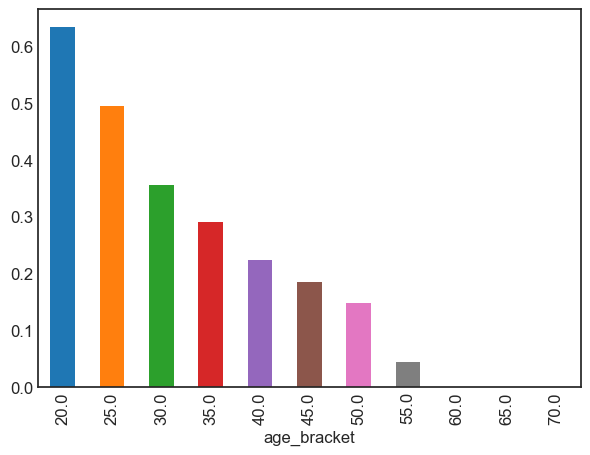

In [39]:
results = X_ts
results['age_bracket'] = results['age'].apply(lambda x:5*(x//5 + 1))
results['prediction'] = preds
results['tag'] = y_ts

(
    results
    .groupby('age_bracket')
    .apply(lambda x:1 - metrics.recall_score(x.tag, x.prediction))
    .plot(kind='bar')
)

## Calculate Parity Measures

* A = { loan applicants with age <= 25 }
* Y = Paid off loan (1.0) or defaulted on loan (0.0)
* C = did we offer a loan (1.0) or not (0.0)

In [40]:
results['is_young'] = (results.age <= 21).replace({True:'young', False:'old'})

In [41]:
# Demographic Parity 
# more old people get loans!

results.groupby('is_young').prediction.mean().to_frame()

,prediction
is_young,
old,0.647960
young,0.234606


In [42]:
# Accuracy Parity

(
    results
    .groupby('is_young')
    .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
    .rename('accuracy')
    .to_frame()
)

,accuracy
is_young,
old,0.715985
young,0.705626


### Is this difference in accuracy significant?
* Use a permutation test:
    - are the distributions of loan-scores "the same" for young/old groups?
    - test-statistic: "the same" is measured in terms of different notions of parity!
* Set a significance level of 0.01

In [43]:
obs = results.groupby('is_young').apply(lambda x: metrics.accuracy_score(x.tag, x.prediction)).diff().iloc[-1]

metrs = []
for _ in range(100):
    s = (
        results[['is_young', 'prediction', 'tag']]
        .assign(is_young=results.is_young.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_young')
        .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)


0.06


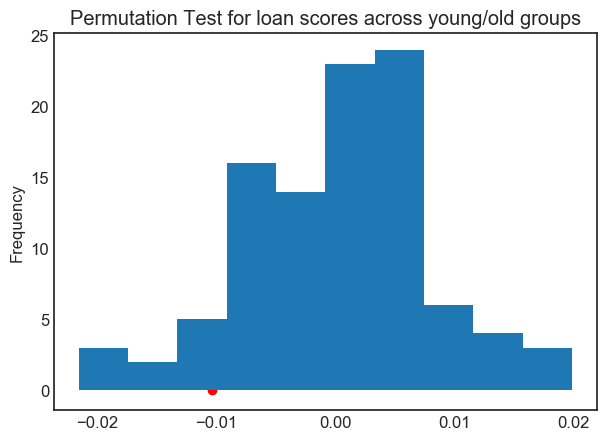

In [44]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for loan scores across young/old groups')
plt.scatter(obs, 0, c='r');

### Are the scores significantly different in terms of True Positive Parity?

* TP-Parity: proportion of appropriately awarded loans across ages.
* Complement of: "Is there a difference between the deny-rates of those who could pay a loan back?
* Run a permutation test with test-statistic given by 'recall' (or 'true positive rate')

In [45]:
(
    results
    .groupby('is_young')
    .apply(lambda x: metrics.recall_score(x.tag, x.prediction))
    .rename('recall')
    .to_frame()
)

,recall
is_young,
old,0.772783
young,0.403917


In [46]:
obs = results.groupby('is_young').apply(lambda x: metrics.recall_score(x.tag, x.prediction)).diff().iloc[-1]

metrs = []
for _ in range(100):
    s = (
        results[['is_young', 'prediction', 'tag']]
        .assign(is_young=results.is_young.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_young')
        .apply(lambda x: metrics.recall_score(x.tag, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)


0.0


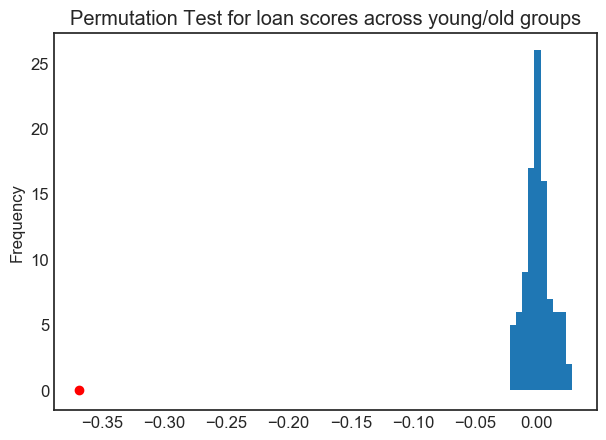

In [47]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for loan scores across young/old groups')
plt.scatter(obs, 0, c='r');